<a href="https://colab.research.google.com/github/Shakthi25-dev/Restaurant-Analysis_Using_Python/blob/main/Cognifyz_Intern_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

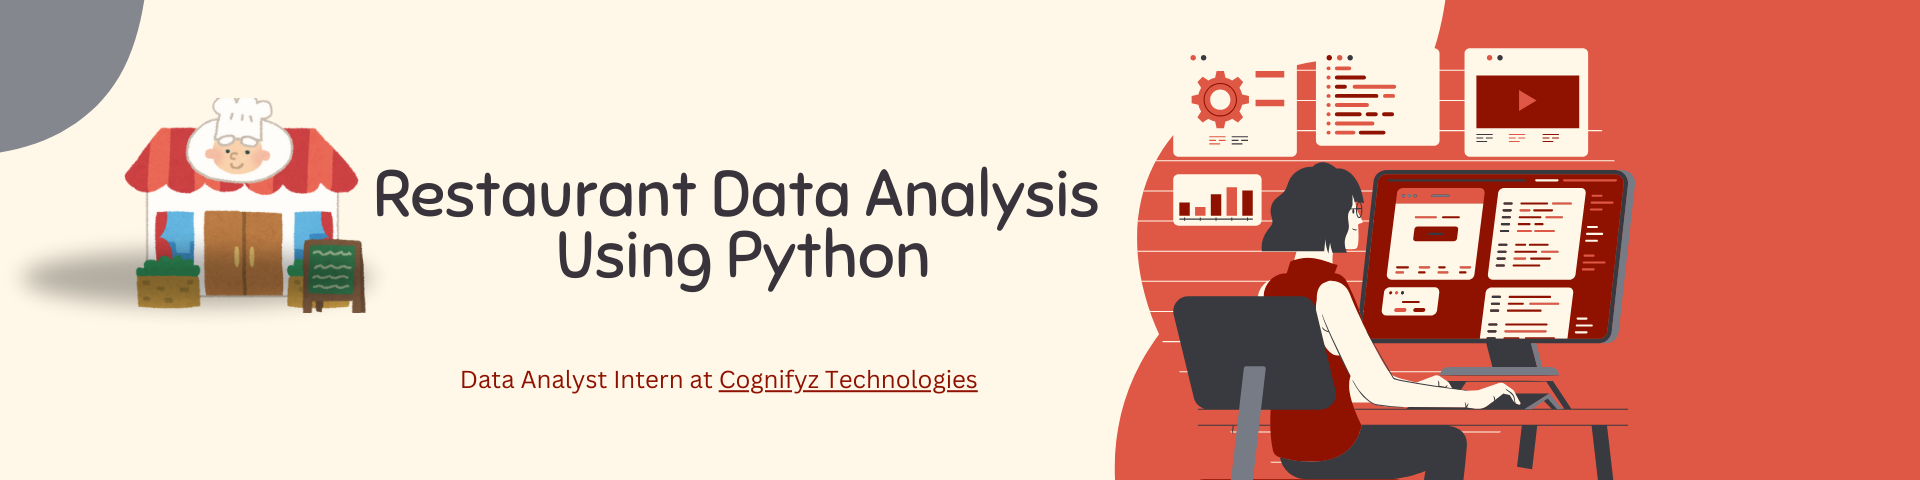

#**Project-Overview**

###*This Project aims to analyze the Dataset which containg Best Restaurant Informations.*
###The goal of analysis such as :

*   **Top three most common cuisines**
*   **City Analysis**

*   **Price range distribution**
*   **Availability of Online Delivery**





In [1]:
from google.colab import drive
drive.mount('/content/drive') # Connect the Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import Library**



*  **Pandas :** Used for manipulation and analysis, enabling efficient data cleaning, filtering and grouping.

*   **Matplotlip :** Utilized for creating static animated and interactive customizable visualization.
*   **Seaborn :** Creating informative and attractive statistical graphics, providing a high-level interface for drawings.





In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "/content/drive/MyDrive/Dataset .csv" # Loading Dataset from Drive
df = pd.read_csv(path)

In [4]:
df.head() # First Five Datas

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info() # Information About Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe() # Statistical Analysis

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# **Task 1 : Top Cuisines**

## *1.1 : Determine the top three most common cuisines in the dataset.*

In [7]:
cusines = df['Cuisines'].str.split(',').explode().value_counts() # Count the Value of Cuisines
top_three = cusines.head(3) # Get the Top Three
top_three

,count
Cuisines,
North Indian,2992
Chinese,1880
Fast Food,1314


<ipython-input-8-207033b28794>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=three_cusines.index, y=three_cusines.values, palette='deep')


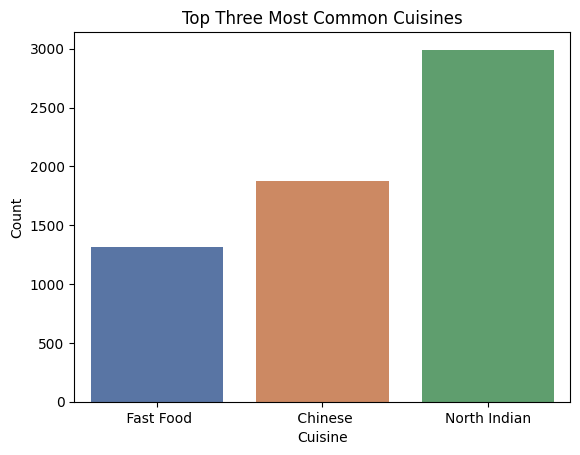

In [8]:
# Visualization of Top 3 Cuisines
three_cusines = top_three.sort_values()
sns.barplot(x=three_cusines.index, y=three_cusines.values, palette='deep')
plt.title('Top Three Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

##*1.2 : Calculate the percentage of restaurants that serve each of the top cuisines.*

In [9]:
Percentage = (top_three / len(df)) * 100 # Calculate the Percentage of Top Three Cuisines
Percentage

,count
Cuisines,
North Indian,31.326563
Chinese,19.683803
Fast Food,13.757722


<ipython-input-10-384bfe719668>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x=Percentage.index, y=Percentage.values, palette='rainbow')


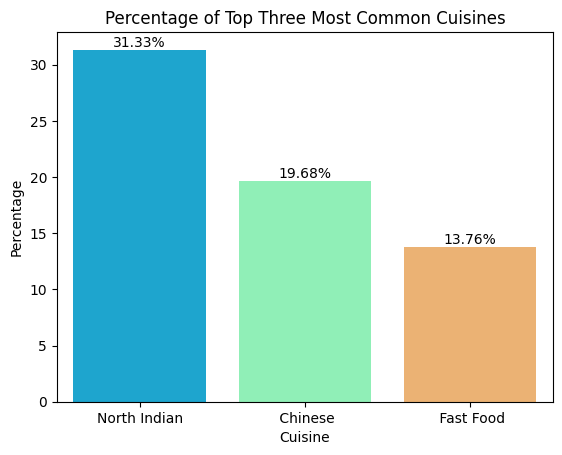

In [10]:
# Visualization of the Percentage of Top Three Cuisines
fig = sns.barplot(x=Percentage.index, y=Percentage.values, palette='rainbow')
plt.title('Percentage of Top Three Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Percentage')
for bar in fig.patches:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')
plt.show()

# **Task 2 : City Analysis**

##*2.1 : Identify the city with the highest number of restaurants in the dataset.*

In [11]:
city = df['City'].value_counts()[[0]] # Count the Value of City
city
city

<ipython-input-11-757f53e325fc>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  city = df['City'].value_counts()[[0]] # Count the Value of City


,count
City,
New Delhi,5473


##*2.2 : Calculate the average rating for restaurants in each city.*

In [12]:
avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False) # Calculate the Average Rating
avg_rating

,Aggregate rating
City,
Inner City,4.900000
Quezon City,4.800000
Makati City,4.650000
Pasig City,4.633333
Mandaluyong City,4.625000
...,...
New Delhi,2.438845
Montville,2.400000
Mc Millan,2.400000


##*2.3 : Determine the city with the highest average rating.*

In [13]:
highest_avg_rating = avg_rating.idxmax() # Get the City with the Highest Average Rating
print("The city with the highest average rating is:", highest_avg_rating)

The city with the highest average rating is: Inner City


#**Task 3 : Price Range Distribution**

##*3.1 : Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.*

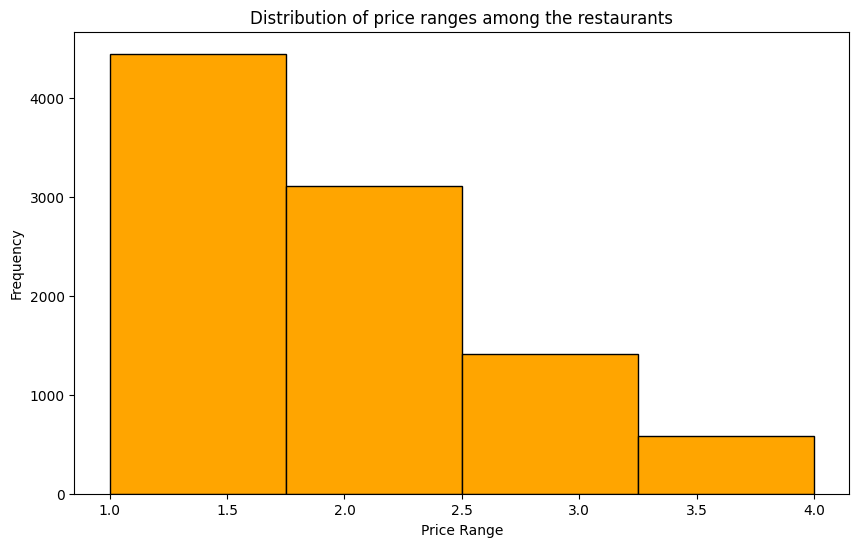

In [14]:
plt.subplots(figsize=(10, 6))
plt.hist(df['Price range'], bins=df['Price range'].nunique(), color='orange',edgecolor='black')
plt.title('Distribution of price ranges among the restaurants')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

##*3.2 : Calculate the percentage of restaurants in each price range category.*

In [15]:
percentage_of_restaurants = df['Price range'].value_counts() / len(df) * 100 # Calculate the Percentage of Restaurants in Each Price Range Category
percentage_of_restaurants

,count
Price range,
1,46.529159
2,32.593446
3,14.741912
4,6.135483


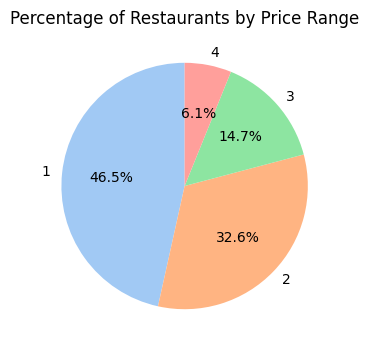

In [16]:
plt.figure(figsize=(5, 4))
plt.pie(percentage_of_restaurants, labels=percentage_of_restaurants.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Percentage of Restaurants by Price Range')
plt.show()

#**Task 4 : Online Delivery**

##*4.1 : Determine the percentage of restaurants that offer online delivery.*

In [17]:
online_delivery = df['Has Online delivery'] == 'Yes' # Filter the Restaurants that Offer Online Delivery
count_of_online_delivery = len(df[online_delivery])
percentage_of_online_delivery = (count_of_online_delivery / len(df)) * 100 # Calculate the Percentage of Restaurants that Offer Online Delivery
percentage_of_online_delivery

25.662234321013504

##*4.2 : Compare the average ratings of restaurants with and without online delivery.*

In [18]:
Compare = df.groupby('Has Online delivery')['Aggregate rating'].mean() # Calculate the Average Rating of Restaurants with and without Online Delivery
Compare

,Aggregate rating
Has Online delivery,
No,2.465296
Yes,3.248837


Text(0.5, 0, 'Has Online Delivery')

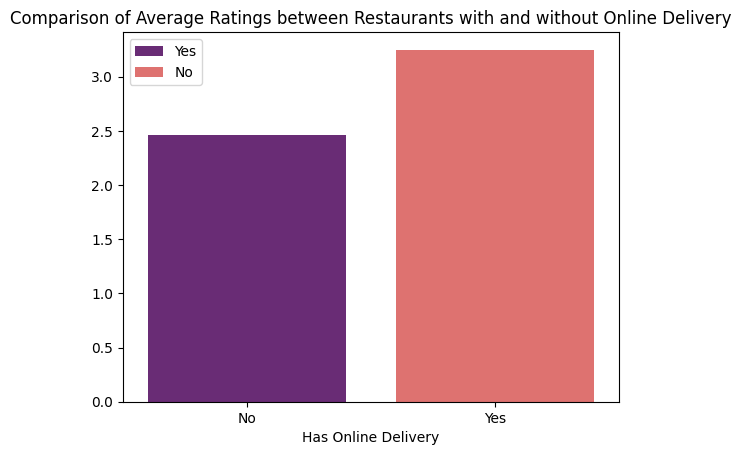

In [20]:
# Visualization of the Average Rating of Restaurants with and without Online Delivery
sns.barplot(x=Compare.index, y=Compare.values, hue =["Yes", "No"], palette='magma')
plt.title('Comparison of Average Ratings between Restaurants with and without Online Delivery')
plt.xlabel('Has Online Delivery')

#**Conclusion**

###My analysis of restaurant data has provided valuable insights and identified the top cuisines, revealed trends in city-wise restaurant distribution, and uncovered patterns in price range distribution. also examined the prevalence of online delivery options, shedding light on consumer convenience. These findings can inform restaurant owners, investors, and food enthusiasts, enabling data-driven decisions and a deeper understanding of the restaurant industry's dynamics.



##GitHub : [link text](https://github.com/Shakthi25-dev/Restaurant-Analysis_Using_Python)
